### Score: `[45]`

Q1. `[5+4+4]` 注意单位，和西经位置~

Q2. `[8+9]` 注意位置选择

Q3. `[5+10]` Good job!

各题批注用`### Note`给出，请自行查阅。

In [41]:
# Assignment 03 by Yang Yi 12432892

import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

# 1.Global methane levels from 2002
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

In [43]:
# 读取文件
ds=xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc",engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:                  (time: 210, bnds: 2, lat: 36, lon: 72, pressure: 10)
Coordinates:
  * time                     (time) datetime64[ns] 2003-01-16T12:00:00 ... 20...
  * lat                      (lat) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * lon                      (lon) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds, pressure
Data variables:
    time_bnds                (time, bnds) datetime64[ns] ...
    lat_bnds                 (lat, bnds) float64 ...
    lon_bnds                 (lon, bnds) float64 ...
    pre                      (pressure) float64 ...
    pre_bnds                 (pressure, bnds) float64 ...
    land_fraction            (lat, lon) float64 ...
    xch4                     (time, lat, lon) float32 ...
    xch4_nobs                (time, lat, lon) float64 ...
    xch4_stderr              (time, lat, lon) float32 ...
    xch4_stddev              (time, lat, lon) float32 ...
    column_averaging_kernel  (time, pressure, lat, lon) float32 ...
    vmr_profile_ch4_apriori  (time, pressure, lat, lon) float32 ...
Attributes: (12/28)
    activity_id:            obs4MIPs
    comment:                Since long time, climate modellers use ensemble a...
    contact:                Maximilian Reuter (maximilian.reuter@iup.physik.u...
    Conventions:            CF-1.7 ODS-2.1
    creation_date:          2021-02-05T09:48:47Z
    data_specs_version:     2.1.0
    ...                     ...
    source_version_number:  v4.3
    title:                  C3S XCH4 v4.3
    tracking_id:            892d184a-7b35-4bba-836a-94b9cfeb360e
    variable_id:            xch4
    variant_info:           Best Estimate
    variant_label:          BE

In [45]:
xch4 = ds.variables['xch4'][:]
ds['xch4']

<xarray.DataArray 'xch4' (time: 210, lat: 36, lon: 72)>
[544320 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2003-01-16T12:00:00 2003-02-15 ... 2020-06-16
  * lat      (lat) float64 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float64 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
Attributes:
    standard_name:  dry_atmosphere_mole_fraction_of_methane
    long_name:      column-average dry-air mole fraction of atmospheric methane
    units:          1
    cell_methods:   time: mean
    fill_value:     1e+20
    comment:        Satellite retrieved column-average dry-air mole fraction ...

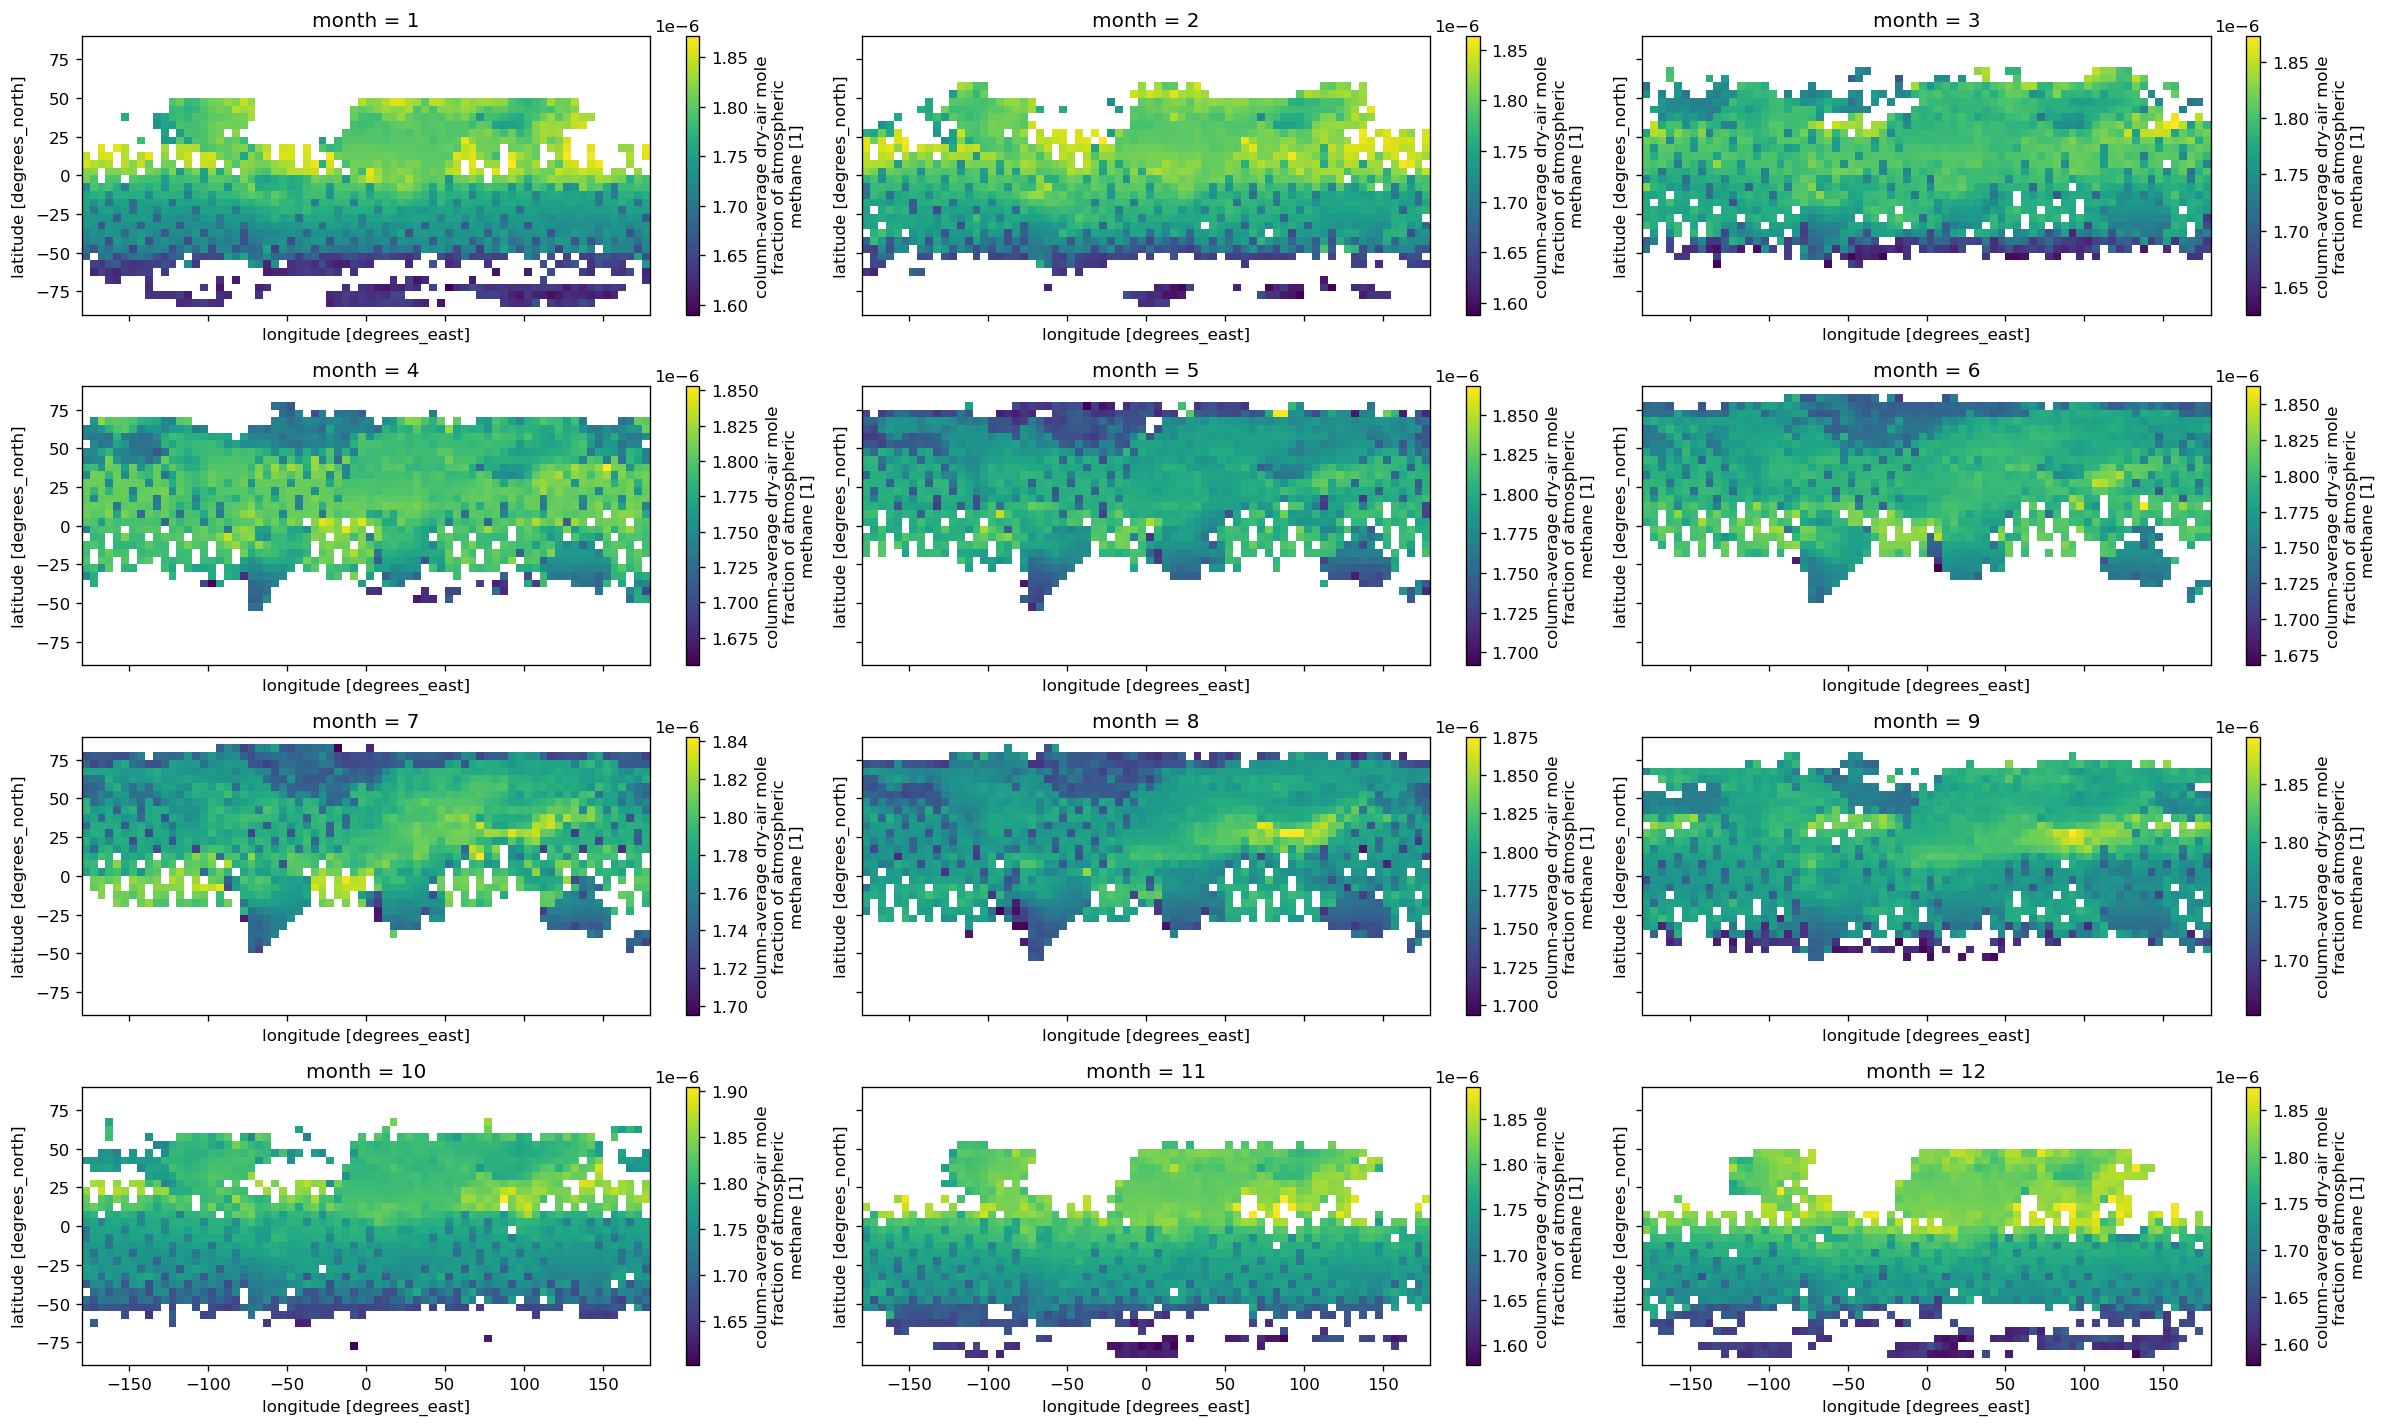

In [47]:
# 1.1 计算每月甲烷气候学并绘制结果
# 计算每月气候学
monthly_climatology =ds.xch4.groupby('time.month').mean()
# 创建12个月的表格
fig,axes=plt.subplots(4,3,figsize=(20,12),sharex=True,sharey=True,dpi=120)
# 拉成一维数组
axes=axes.ravel()
for i in range(12):
    axes[i]=plt.subplot(4,3,i+1)
    monthly_climatology[i,:,:].plot()
    plt.tight_layout()  # 调整布局

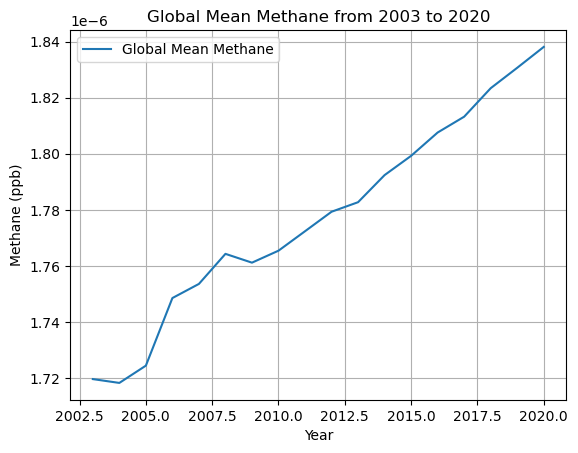

In [48]:
# 1.2 绘制2003年1月至2020年6月全球平均甲烷时间序列
xch4 = ds['xch4']
# 按年份分组并计算每年的平均值
xch4_year = xch4.groupby('time.year').mean()
# 计算全球平均
xch4_global_mean = xch4_year.mean(dim=['lon', 'lat'])
# 绘制时间序列
xch4_global_mean.plot(label='Global Mean Methane')
plt.title('Global Mean Methane from 2003 to 2020')
plt.xlabel('Year')
plt.ylabel('Methane (ppb)') ### Note: 纵坐标如果要标ppb的话，数值要乘以10^9，以下同理
plt.legend()
plt.grid(True)
plt.show()

# 全球甲烷含量在逐步增加，并且含量增高趋势逐渐更加明显

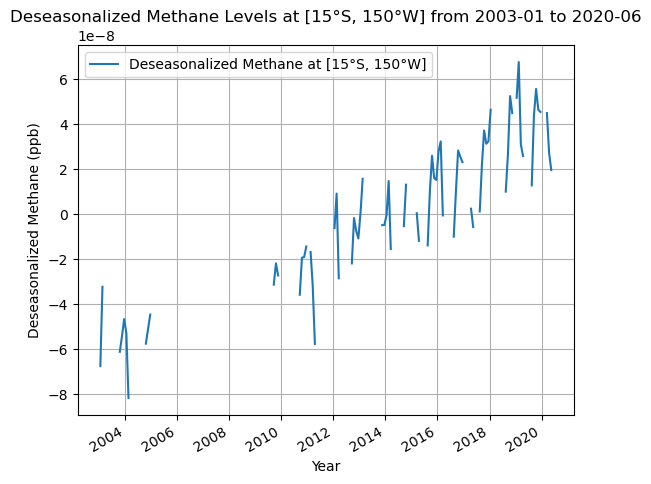

In [49]:
# 1.3 绘制2003年1月至2020年6月[15°S, 150°W]点去季节化甲烷水平时间序列
# 在南纬15度，西经150度处去季节性甲烷变化总体上在逐年增高
lat_point = -15
lon_point = 150 ### Note: 在这个nc文件中，西经150度是-150
# 提取特定点数据
methane_at_point = ds['xch4'].sel(lat=lat_point, lon=lon_point, method='nearest')
# 计算季节平均值
seasonal_mean = methane_at_point.groupby('time.month').mean()
# 去季节化
deseasonalized = methane_at_point.groupby('time.month') - seasonal_mean
# 绘制去季节化后的时间序列
deseasonalized.plot(label='Deseasonalized Methane at [15°S, 150°W]')
plt.title('Deseasonalized Methane Levels at [15°S, 150°W] from 2003-01 to 2020-06')
plt.xlabel('Year')
plt.ylabel('Deseasonalized Methane (ppb)')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
# 2.Niño 3.4 index
# 本题我求助了我的师姐龙师倩
SST=xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc",engine='netcdf4')
SST

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [51]:
SST['sst']

<xarray.DataArray 'sst' (time: 684, lat: 89, lon: 180)>
[10957680 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Attributes:
    pointwidth:          1.0
    valid_min:           -3.0
    valid_max:           45.0
    units:               degree_Celsius
    long_name:           Extended reconstructed sea surface temperature
    standard_name:       sea_surface_temperature
    iridl:hasSemantics:  iridl:SeaSurfaceTemperature

In [52]:
#2.1 计算Niño 3.4区域SST的月度气候学和异常值
group_data = SST.sst.sel(lon=slice(120,170),lat=slice(-5,5)).groupby('time.month')
### Note: 本题170W-120W对应lon为(190, 240)
sst_dif = group_data-group_data.mean(dim='time')
# 计算得到异常值
anomalies = sst_dif.resample(time="3M").mean(dim="time") ### Note: 重采样和滑动平均不一样
anomalies

D:\python111\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


<xarray.DataArray 'sst' (time: 229, lat: 5, lon: 26)>
array([[[-0.4533596 , -0.43008804, -0.3652172 , ..., -0.5904255 ,
         -0.51613617, -0.5157356 ],
        [-0.14541245, -0.14106178, -0.20046997, ..., -0.60107803,
         -0.5806999 , -0.5200424 ],
        [ 0.03437614, -0.01860619, -0.1291542 , ..., -0.61279106,
         -0.5868416 , -0.55138206],
        [-0.03416824, -0.07881355, -0.139431  , ..., -0.5768242 ,
         -0.56368065, -0.5451031 ],
        [-0.11306   , -0.14630127, -0.18651962, ..., -0.47527504,
         -0.48386002, -0.49680328]],

       [[-0.29540953, -0.25229773, -0.21316402, ..., -0.6501789 ,
         -0.5796814 , -0.58689374],
        [-0.18128014, -0.12417793, -0.13654137, ..., -0.6904233 ,
         -0.68461037, -0.64244586],
        [-0.09715843, -0.08390108, -0.10546494, ..., -0.7069289 ,
         -0.6881733 , -0.6722056 ],
        [-0.18694179, -0.16128285, -0.128987  , ..., -0.64433545,
         -0.62889546, -0.6225446 ],
        [-0.27703476, -0.2525959 , -0.20511119, ..., -0.517519  ,
...
          0.51037025,  0.44631258],
        [ 0.31214967,  0.4855779 ,  0.7164224 , ...,  0.4436461 ,
          0.3200194 ,  0.2053426 ],
        [ 0.39565277,  0.5145791 ,  0.7320716 , ...,  0.39797845,
          0.23362541,  0.08429018],
        [ 0.44386673,  0.44989267,  0.5983505 , ...,  0.5368557 ,
          0.3789749 ,  0.21928024],
        [ 0.42669234,  0.40143776,  0.4725081 , ...,  0.714798  ,
          0.5879669 ,  0.46769652]],

       [[ 0.32543087,  0.3451271 ,  0.4029932 , ...,  0.51263714,
          0.4383192 ,  0.36778736],
        [ 0.42484474,  0.5078449 ,  0.57851505, ...,  0.34471035,
          0.22703075,  0.10994244],
        [ 0.5032301 ,  0.5828867 ,  0.66394806, ...,  0.27353382,
          0.13096333, -0.00620747],
        [ 0.46020794,  0.49208736,  0.58321095, ...,  0.37838078,
          0.25306892,  0.11438084],
        [ 0.3544016 ,  0.36249638,  0.44186687, ...,  0.5236778 ,
          0.4169016 ,  0.31012917]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 120.0 122.0 124.0 126.0 ... 164.0 166.0 168.0 170.0
  * time     (time) datetime64[ns] 1960-01-31 1960-04-30 ... 2017-01-31

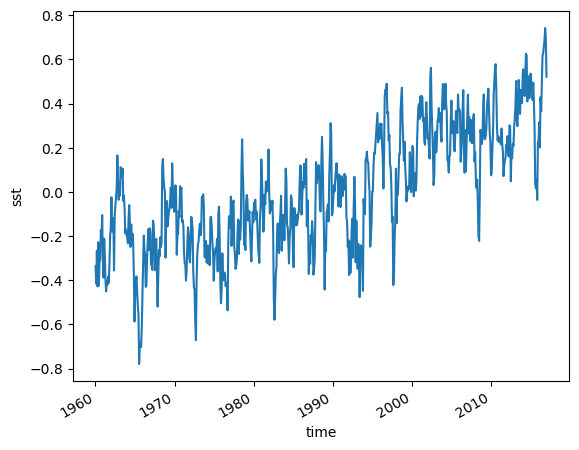

In [53]:
# 2.2可视化Niño 3.4指数
# 对去季节变化进行可视化
sst_dif.mean(dim=['lat','lon']).plot()

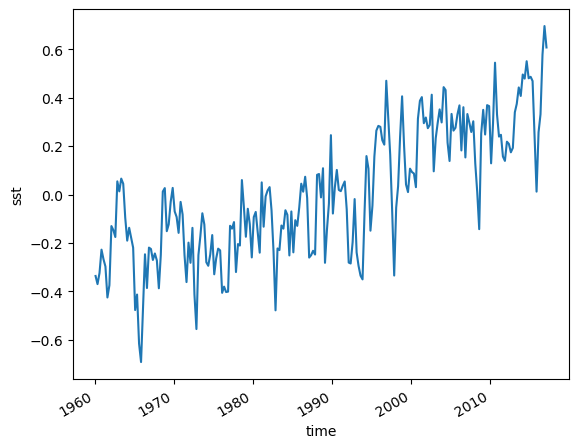

In [54]:
# 以三个月为尺度的异常值可视化
anomalies.mean(dim=['lat','lon']).plot()

In [55]:
anom_resample=anomalies.mean(dim=['lat','lon'])
anom_resample

<xarray.DataArray 'sst' (time: 229)>
array([-0.33638978, -0.37003502, -0.3239999 , -0.22765496, -0.26742154,
       -0.29706082, -0.42516705, -0.3743719 , -0.13013509, -0.14662217,
       -0.17526981,  0.05451763,  0.01313595,  0.06591826,  0.04469279,
       -0.09537051, -0.19031097, -0.13719894, -0.1779783 , -0.21954633,
       -0.47708625, -0.41306534, -0.61572886, -0.6919386 , -0.46526185,
       -0.24677637, -0.38609752, -0.21915027, -0.22480527, -0.2702479 ,
       -0.2433737 , -0.27216244, -0.38718328, -0.24891156,  0.01236948,
        0.02674307, -0.1512471 , -0.12314105, -0.02989539,  0.02746935,
       -0.06977199, -0.09244606, -0.15824564, -0.03030802, -0.08215355,
       -0.24998821, -0.36153477, -0.19859119, -0.2819085 , -0.13750277,
       -0.41236964, -0.5556232 , -0.2498695 , -0.1719188 , -0.07733187,
       -0.12359207, -0.27969757, -0.29421753, -0.2476332 , -0.16733189,
       -0.32939062, -0.26420408, -0.22348669, -0.23065028, -0.4060981 ,
       -0.38037926, -0.402714  , -0.4010484 , -0.12891535, -0.1408334 ,
       -0.11381914, -0.32007325, -0.2045178 , -0.21054327,  0.05988208,
       -0.05048161, -0.17434482, -0.05864822, -0.12214249, -0.25969198,
       -0.09298059, -0.07176815, -0.1562431 , -0.24005908,  0.05026476,
       -0.13279352, -0.00744956,  0.01719128,  0.03076849, -0.06558541,
       -0.2355391 , -0.47826445, -0.22260715, -0.22947134, -0.12784567,
       -0.14085631, -0.06479608, -0.08387943, -0.2515224 , -0.06982005,
...
       -0.19591552, -0.01864021, -0.23917682, -0.29464397, -0.33528358,
       -0.35045642, -0.07411855,  0.15897055,  0.10697694, -0.14921309,
       -0.04572915,  0.1568192 ,  0.2641609 ,  0.28375474,  0.2797301 ,
        0.22447583,  0.20625184,  0.4701414 ,  0.31612307,  0.16429943,
       -0.07111615, -0.33452275, -0.05399809,  0.03474595,  0.23891602,
        0.40586895,  0.20059861,  0.04168706,  0.01015314,  0.10702178,
        0.09294897,  0.0868701 ,  0.03048421,  0.31326863,  0.38727093,
        0.40259364,  0.29476655,  0.3183891 ,  0.27422825,  0.28749415,
        0.4125064 ,  0.09602283,  0.23268497,  0.294751  ,  0.35175908,
        0.2979943 ,  0.4437765 ,  0.4319937 ,  0.21467721,  0.13865069,
        0.33312672,  0.26419055,  0.2758488 ,  0.33165234,  0.36844757,
        0.18227148,  0.3608378 ,  0.15332824,  0.33264446,  0.2980027 ,
        0.2584041 ,  0.30271897,  0.12783696,  0.01041856, -0.14296326,
        0.25190043,  0.3500043 ,  0.2480731 ,  0.36936525,  0.36543158,
        0.12898877,  0.29491633,  0.54474586,  0.3310301 ,  0.23948544,
        0.24682468,  0.15716833,  0.13909237,  0.21837936,  0.209491  ,
        0.17454773,  0.19300571,  0.34000415,  0.3749026 ,  0.442632  ,
        0.40747023,  0.4960373 ,  0.4790274 ,  0.5508579 ,  0.48036876,
        0.48651356,  0.469067  ,  0.24312   ,  0.01210874,  0.25750467,
        0.33146283,  0.57795835,  0.6961747 ,  0.6076585 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-31 1960-04-30 ... 2017-01-31

Text(0.5, 1.0, 'SST Anomaly in Nino 3.4 Region')

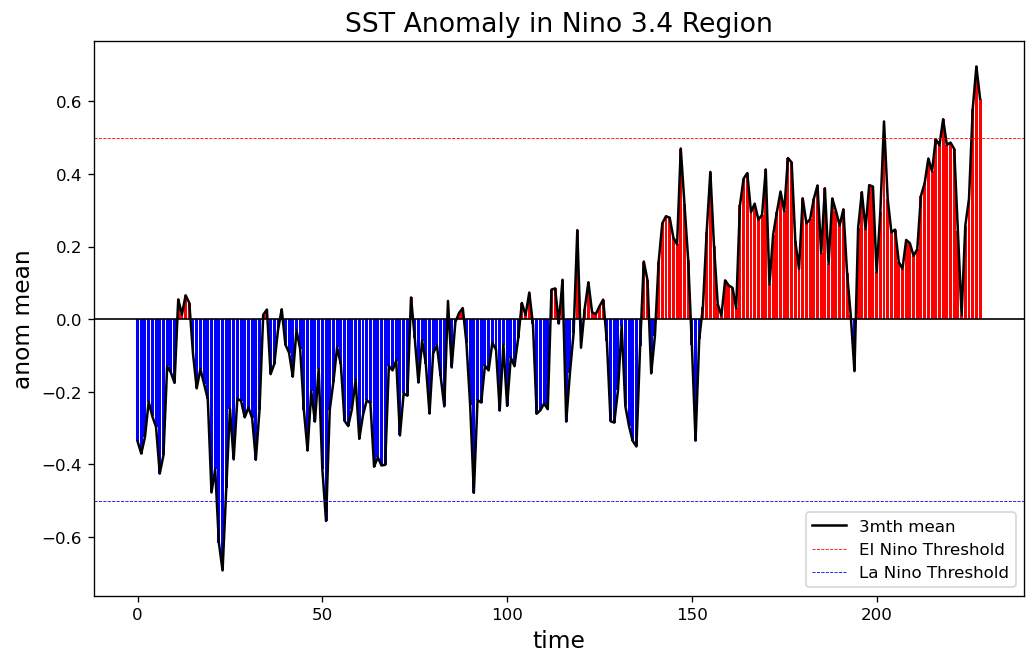

In [75]:
# 创建一个DataFrame，其中只包含温度异常大于等于0的数据，并命名为'anom>=0'
df=pd.DataFrame(anom_resample.where(anom_resample>=0),columns=['anom>=0'])

# 创建一个DataFrame，其中包含温度异常小于0的数据，并命名为'anom<0'
df['anom<0']=pd.DataFrame(anom_resample.where(anom_resample<0))
df['date'] = pd.DataFrame(anom_resample.time)
df.set_index('date',inplace=True)

# 根据正负进行柱状图的绘制与上色
plt.figure(figsize=(10,6),dpi=120)
plt.bar(np.arange(len(df['anom>=0'])),df['anom>=0'],color="red")
plt.bar(np.arange(len(df['anom<0'])),df['anom<0'],color="blue")

# 绘制原始温度异常数据的折线图，颜色为黑色
plt.plot(anom_resample,'k-')

# 作出0，0.5，-0.5三条线，设置图例
plt.axhline(y=0.5,color="red",linestyle='--',linewidth=0.5)
plt.axhline(y=-0.5,color="blue",linestyle='--',linewidth=0.5)
plt.axhline(y=0,color="black",linestyle='-',linewidth=1)
plt.legend(labels=['3mth mean','EI Nino Threshold','La Nino Threshold'],loc=4)
plt.ylabel('anom mean',fontsize=14)
plt.xlabel('time',fontsize=14)
plt.title('SST Anomaly in Nino 3.4 Region',fontsize=16)

数据anom_resample代表重新采样的平均值，绘制异常值大于零的柱状图，颜色为红色；异常值小于零的柱状图，颜色为蓝色。3mth mean的黑实线代表异常值为零，EI Nino Threshold的红色虚线代表异常值为0.5，La Nino Threshold的蓝色虚线代表异常值为-0.5。

In [58]:
# 3.Explore a netCDF dataset
# 这里我向陈怡学习了如何导入文件
import xarray as xr
import glob
# 定义文件路径
file='D:\\ESE5023-Assignments-12432892\\output_file\\*.nc4'
# 获取所有文件路径
files=glob.glob(file)
# 合并多个文件
CO2=xr.open_mfdataset(files,combine='by_coords')
# 查看合并后的文档
CO2

<xarray.Dataset>
Dimensions:   (lat: 361, lon: 576, time: 86)
Coordinates:
  * lat       (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon       (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time      (time) datetime64[ns] 2015-01-16T12:00:00 ... 2022-02-15
Data variables:
    XCO2      (time, lat, lon) float64 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    XCO2PREC  (time, lat, lon) float64 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
Attributes: (12/25)
    RangeBeginningDate:             2017-08-01
    RangeBeginningTime:             00:00:00.000000
    RangeEndingDate:                2017-08-01
    RangeEndingTime:                23:59:99.999999
    SpatialCoverage:                global
    SouthBoundingCoordinate:        -90.0
    ...                             ...
    ProductionDateTime:             2022-03-15T12:04:33Z
    History:                        Original file generated: Tue Mar 15 12:04...
    ShortName:                      OCO2_GEOS_L3CO2_MONTH_10r
    LongName:                       OCO-2 GEOS Level 3 monthly, 0.5x0.625 ass...
    Title:                          OCO-2 GEOS Level 3 monthly, 0.5x0.625 ass...
    IdentifierProductDOI:           10.5067/BGFIODET3HZ8

D:\python111\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


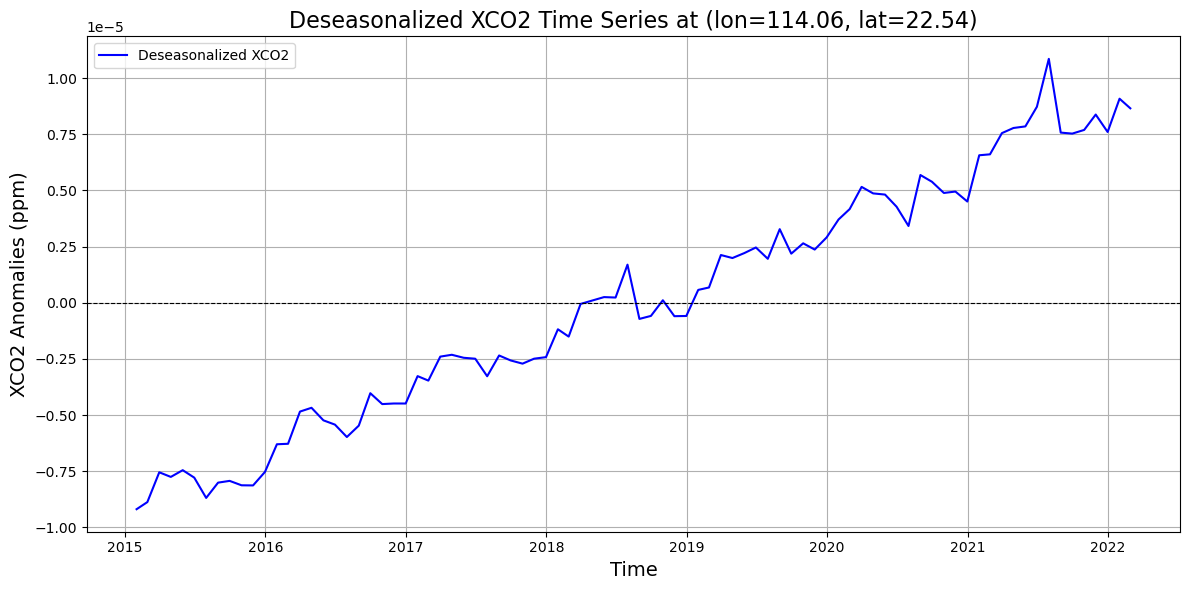

In [73]:
# 3.1 本题我请教了陈怡同学
# 根据数据文件，我绘制了我的家乡哈尔滨市（126.53°E，45.75°N）的XCO2的时间序列

# 根据数据集中的经纬度信息选择哈尔滨市的数据
xco2_selected = CO2['XCO2'].sel(lon=126.53, lat=45.75, method='nearest')

# 计算哈尔滨市每月XCO2的平均值，用于表示季节性成分
monthly_mean = xco2_selected.groupby('time.month').mean(dim='time')

# 从原始数据中去除季节性成分，得到去季节化后的异常值
xco2_deseasonalized = xco2_selected - monthly_mean[xco2_selected['time.month'] - 1]

# 获取时间序列
time_series = xco2_deseasonalized.resample(time='M').mean()  # 按月重采样

# 绘制去季节化后的时间序列
plt.figure(figsize=(12, 6))
plt.plot(time_series['time'], time_series, label='Deseasonalized XCO2', color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # 添加黑色的虚线作为参考线
plt.title('Deseasonalized XCO2 Time Series at (lon=114.06, lat=22.54)', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('XCO2 Anomalies (ppm)', fontsize=14)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

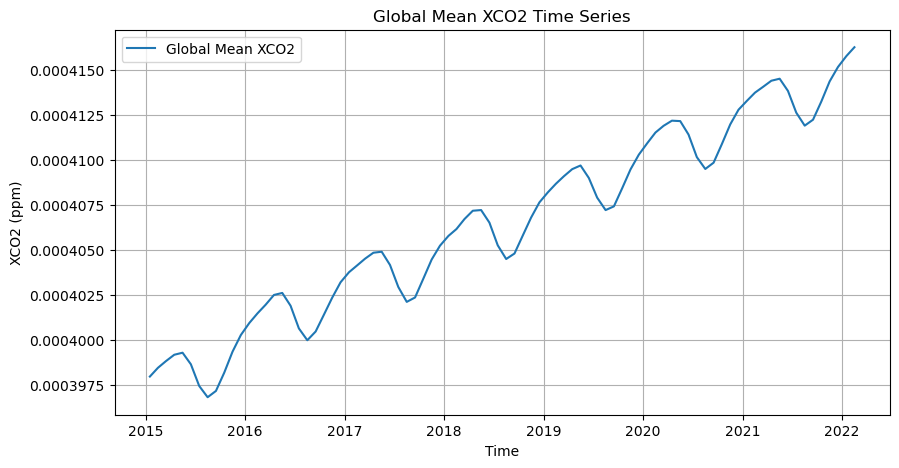

In [93]:
# 3.2.1
#时间序列图：全球平均XCO2
global_mean_xco2 = CO2['XCO2'].mean(dim=['lat', 'lon'])
plt.figure(figsize=(10, 5))
plt.plot(global_mean_xco2['time'], global_mean_xco2, label='Global Mean XCO2')
plt.title('Global Mean XCO2 Time Series')
plt.xlabel('Time')
plt.ylabel('XCO2 (ppm)')
plt.legend()
plt.grid()
plt.show()

Text(0.5, 1.0, 'Average CO2 Concentration')

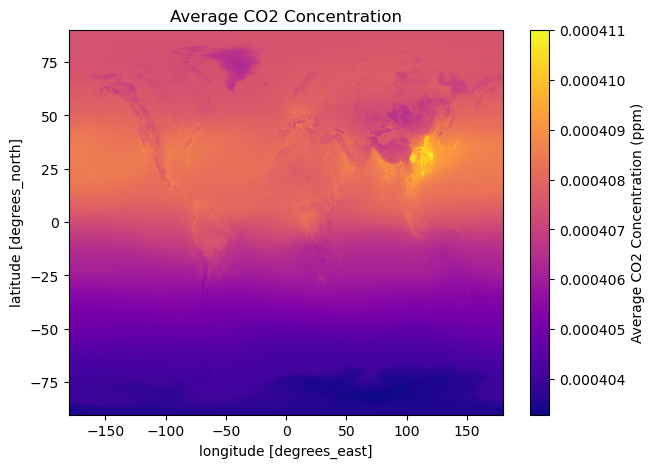

In [127]:
# 3.2.2
# 计算XCO2的平均浓度在不同地点的变化
xco2 = CO2['XCO2']  
# 计算 XCO2的整体平均值，按照时间维度
xco2_mean = xco2.mean(dim='time')
#设置图象大小
plt.figure(figsize=(7, 5))
# 绘制 XCO2 的整体平均值
xco2_mean.plot(cmap='plasma', cbar_kwargs={'label': 'Average CO2 Concentration (ppm)'})
plt.title('Average CO2 Concentration')

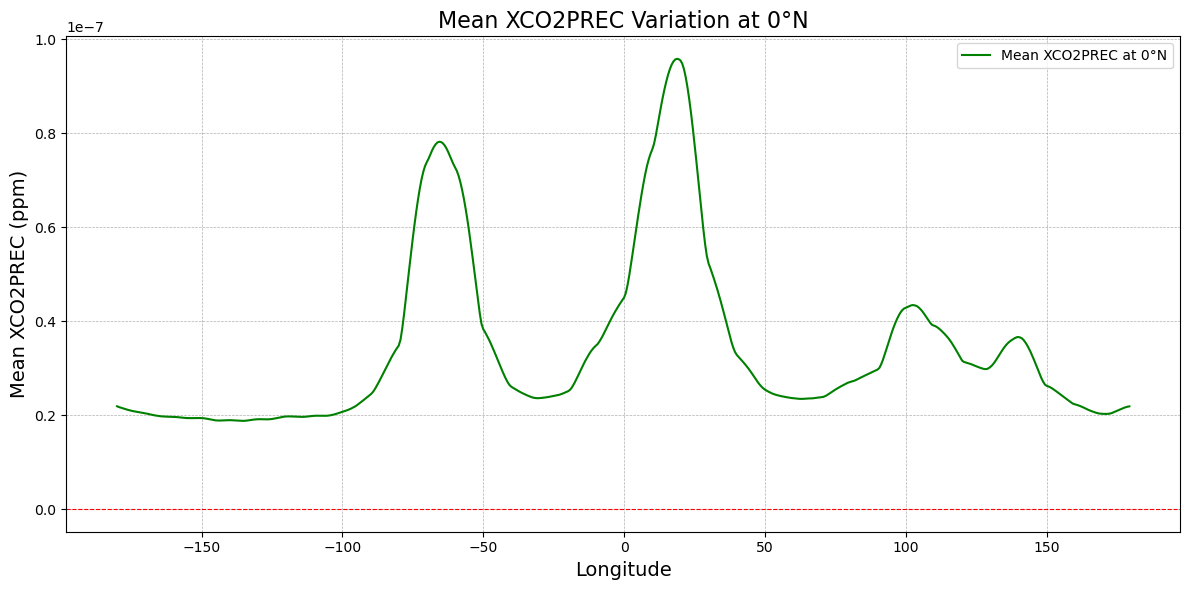

In [133]:
# 3.2.3
# 绘制在 0°纬度线上 XCO2PREC的均值变化

# 选择纬度为0°的数据
xco2_actual_0N = xco2_actual.sel(lat=0, method='nearest')

# 计算 XCO2PREC的时间平均值
xco2_actual_mean = xco2_actual_0N.mean(dim='time')

# 绘制 XCO2PREC在0°纬度的平均值变化
plt.figure(figsize=(12, 6))
xco2_actual_mean.plot(label='Mean XCO2PREC at 0°N', color='green')
plt.title('Mean XCO2PREC Variation at 0°N', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Mean XCO2PREC (ppm)', fontsize=14)
# 添加水平线（0线）
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

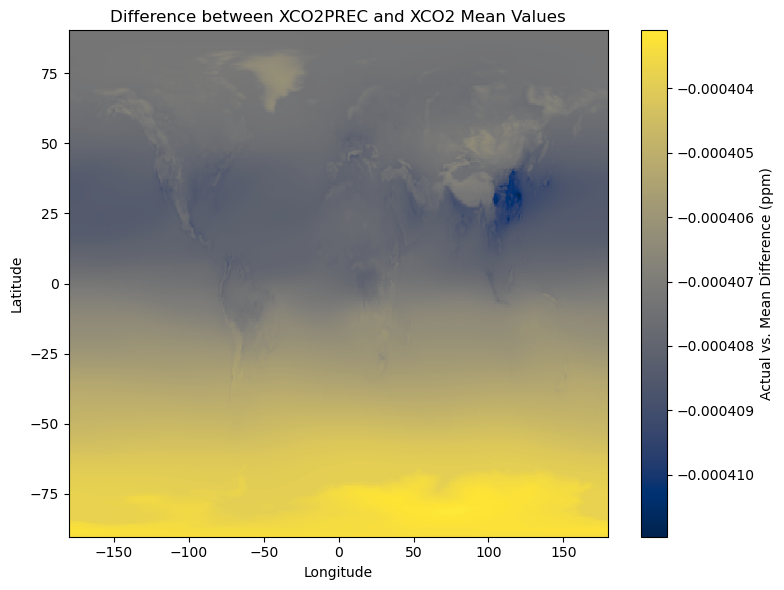

In [129]:
# 3.2.4
# 计算XCO2值与XCO2PREC值的差异
xco2_actual = CO2['XCO2PREC']
# 计算XCO2PREC的平均值
xco2_actual_mean = xco2_actual.mean(dim='time')
# 计算二者之间的差异
difference = xco2_prec_mean - xco2_mean
# 绘制图形
plt.figure(figsize=(8, 6))
difference.plot(cmap='cividis', cbar_kwargs={'label': 'Actual vs. Mean Difference (ppm)'})
plt.title('Difference between XCO2PREC and XCO2 Mean Values')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

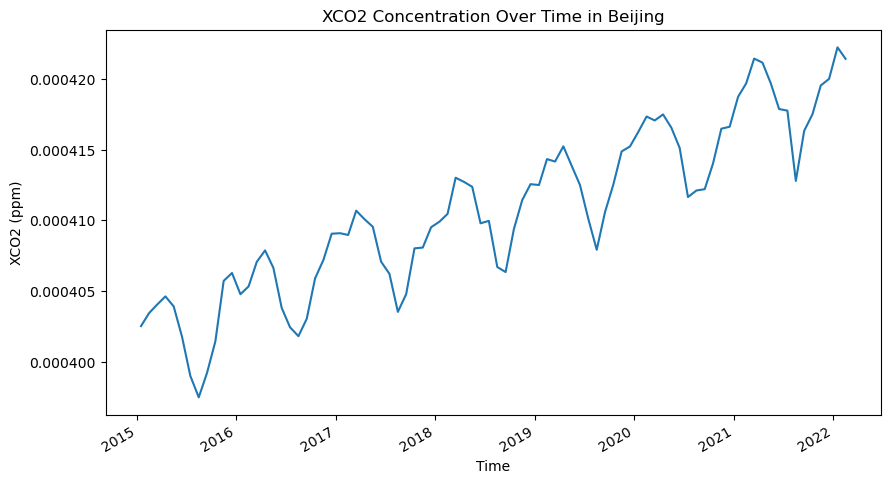

In [137]:
# 3.2.5
# 选择北京的XCO2数据，北京（假设纬度为39.9，经度为116.4）
xco2_beijing = CO2['XCO2'].sel(lat=39.9, lon=116.4, method='nearest')

# 绘制XCO2浓度随时间变化图
plt.figure(figsize=(10, 5))
xco2_beijing.plot()
plt.title('XCO2 Concentration Over Time in Beijing')
plt.xlabel('Time')
plt.ylabel('XCO2 (ppm)')
plt.show()